In [4]:
!pip install matplotlib
!pip install sklearn
from google.colab import drive
drive.mount('/content/gdrive')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Mounted at /content/gdrive


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
warnings.filterwarnings("ignore")
from wordcloud import WordCloud

In [5]:
df_data = pd.read_csv(filepath_or_buffer="/content/gdrive/MyDrive/ColabNotebooks/NLP_Review_Analysis/amzn_customer_reviews_new.csv", sep=",")
df_data.head(3)

,Pseudo,Title,Review,Rating,Verified Purchase,Date,Score,Compound,Sentiment,New rating,New date,Country
0,Assault Kittens,really good option portability,impressive form factor really good balance siz...,4.5 out of 5 stars,Yes,"Reviewed in the United States on June 18, 2021","{'neg': 0.014, 'neu': 0.736, 'pos': 0.249, 'co...",0.9941,positive,4.5,2021-06-18,United States
1,Kenneth Cramer,excellent portable gaming,write review anyone fence purchasing since rea...,5.0 out of 5 stars,Yes,"Reviewed in the United States on July 7, 2021","{'neg': 0.016, 'neu': 0.88, 'pos': 0.104, 'com...",0.9921,positive,5.0,2021-07-07,United States
2,Assault Kittens,best inch world,sell macbook best decisions lifeif use macbook...,1.0 out of 5 stars,Yes,"Reviewed in the United States on June 18, 2021","{'neg': 0.0, 'neu': 0.854, 'pos': 0.146, 'comp...",0.8779,positive,1.0,2021-06-18,United States


In [6]:
vectorizer = TfidfVectorizer(
    encoding="utf-8",
    lowercase=False,
    tokenizer=None,
    analyzer="word",
    stop_words=None,
    ngram_range=(1, 1),
    min_df=1,
    norm="l2",
    use_idf=True
)

train_data = vectorizer.fit_transform(df_data["Title"])

In [7]:
lda_model = LatentDirichletAllocation(n_components=4)
lda_model.fit(train_data)

LatentDirichletAllocation(n_components=4)

In [8]:
lda_matrix = lda_model.fit_transform(train_data)

In [9]:
lda_components = lda_model.components_

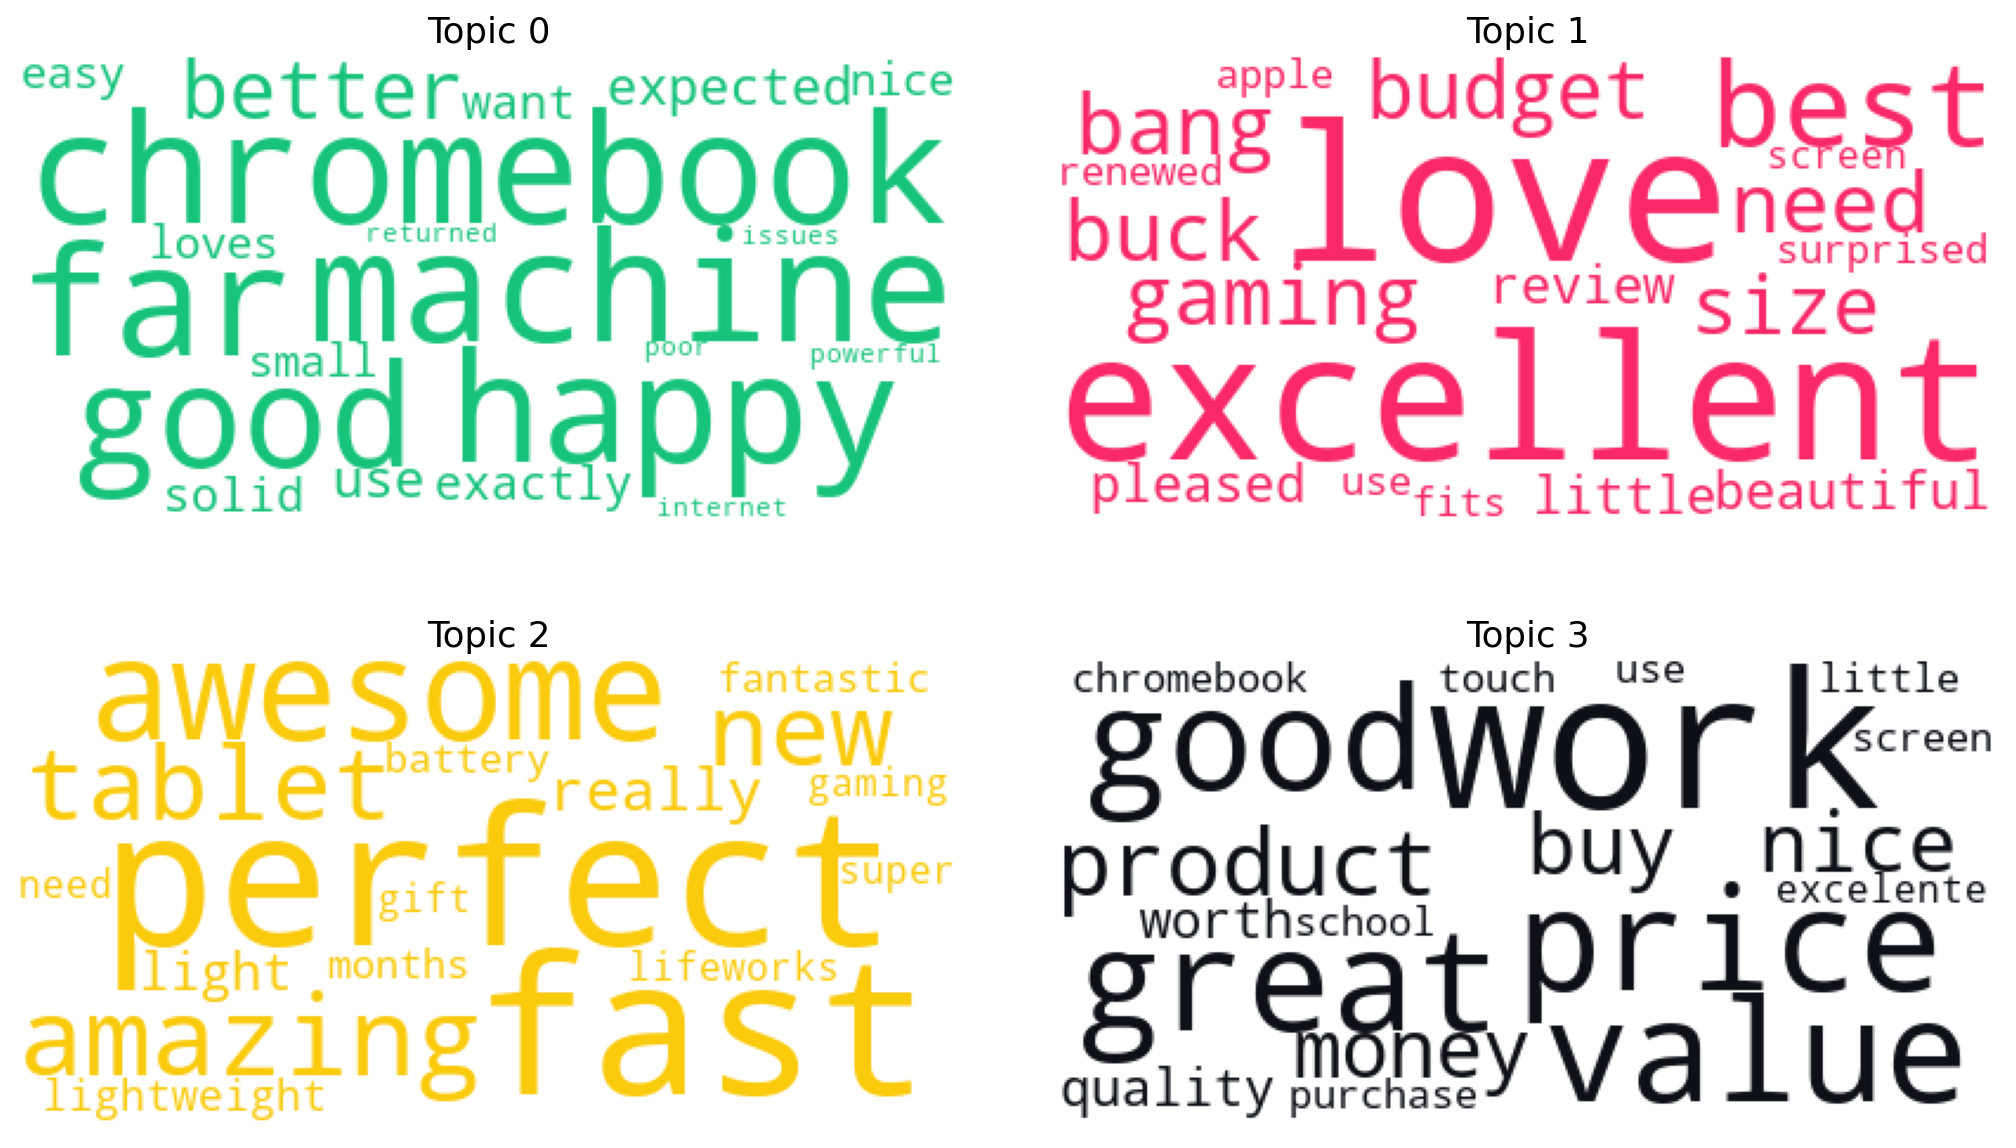

In [11]:
terms = vectorizer.get_feature_names()
topic_words = []
for index, component in enumerate(lda_components):
    zipped = zip(terms, component)
    top_terms_key = sorted(zipped, key=lambda t: t[1], reverse=True)[:20]
    top_terms_list = list(dict(top_terms_key).keys())
    topic_words.append(top_terms_list)

list_colors = ["#17C37B", "#F92969", "#FACA0C", "#0D1117"]

fig, axes = plt.subplots(2, 2, figsize=(16, 10), sharey=True, dpi=160)

for i, ax in enumerate (axes.flatten()):
    wc = WordCloud(
        background_color="white",
        max_words=20,
        max_font_size=80,
        colormap="tab10",
        color_func=lambda *args, **kwargs: list_colors[i],
        prefer_horizontal=1.0
    )
    fig.add_subplot(ax)
    wc.generate((" ").join(topic_words[i]))
    plt.gca().imshow(wc)
    plt.gca().set_title("Topic "+str(i), fontdict=dict(size=16))
    plt.gca().axis("off")

plt.axis("off")
plt.subplots_adjust(wspace=0.1, hspace=0)
plt.margins(x=0, y=0)
plt.show()

In [12]:
terms = vectorizer.get_feature_names()
topic_words = []
for index, component in enumerate(lda_components):
    zipped = zip(terms, component)
    top_terms_key = sorted(zipped, key=lambda t: t[1], reverse=True)[:15]
    top_terms_list = list(dict(top_terms_key).keys())
    topic_words.append(top_terms_list)

topic_0 = topic_words[0]
topic_1 = topic_words[1]
topic_2 = topic_words[2]
topic_3 = topic_words[3]

In [13]:
df_topic_0 = pd.DataFrame({"Topic": [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], "Word": topic_0})
df_topic_1 = pd.DataFrame({"Topic": [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1], "Word": topic_1})
df_topic_2 = pd.DataFrame({"Topic": [2,2,2,2,2,2,2,2,2,2,2,2,2,2,2], "Word": topic_2})
df_topic_3 = pd.DataFrame({"Topic": [3,3,3,3,3,3,3,3,3,3,3,3,3,3,3], "Word": topic_3})

In [14]:
def counts_word(text, dataframe) -> pd.core.frame.DataFrame:
    """
    Function that allows to count each word from a text.
    
    Parameters
    ----------
    text : str or pandas.core.series.Series
        Text from which words must be counted.
    
    dataframe : pandas.core.frame.DataFrame
        Dataframe that allows the extraction of the final results.

    Returns
    -------
    pandas.core.frame.DataFrame
        Dataframe that contains the final result.

    """
    words_list = []
    for review in text:
        sentence = review.split(" ")
        for word in sentence:
            words_list.append(word)
            
    counts = dict()
    words_topic = dataframe.Word.to_list()
    words_topics = set(words_topic)
    for word in words_list:
        if word in words_topic:
            if word in counts:
                counts[word] += 1
            else:
                counts[word] = 1
            
    df_data = pd.DataFrame(list(counts.items()), columns=["Word", "Frequency"])
    dataframe = dataframe.merge(df_data, how="left", on="Word")
    
    return dataframe

df_topic_0 = counts_word(df_data["Title"], df_topic_0)
df_topic_1 = counts_word(df_data["Title"], df_topic_1)
df_topic_2 = counts_word(df_data["Title"], df_topic_2)
df_topic_3 = counts_word(df_data["Title"], df_topic_3)

In [15]:
grouped_df = pd.DataFrame(
    {
        "Topic": [0, 1, 2, 3],
        "Frequency": [
            df_topic_0.Frequency.sum(),
            df_topic_1.Frequency.sum(),
            df_topic_2.Frequency.sum(),
            df_topic_3.Frequency.sum(),
        ]
    }
)

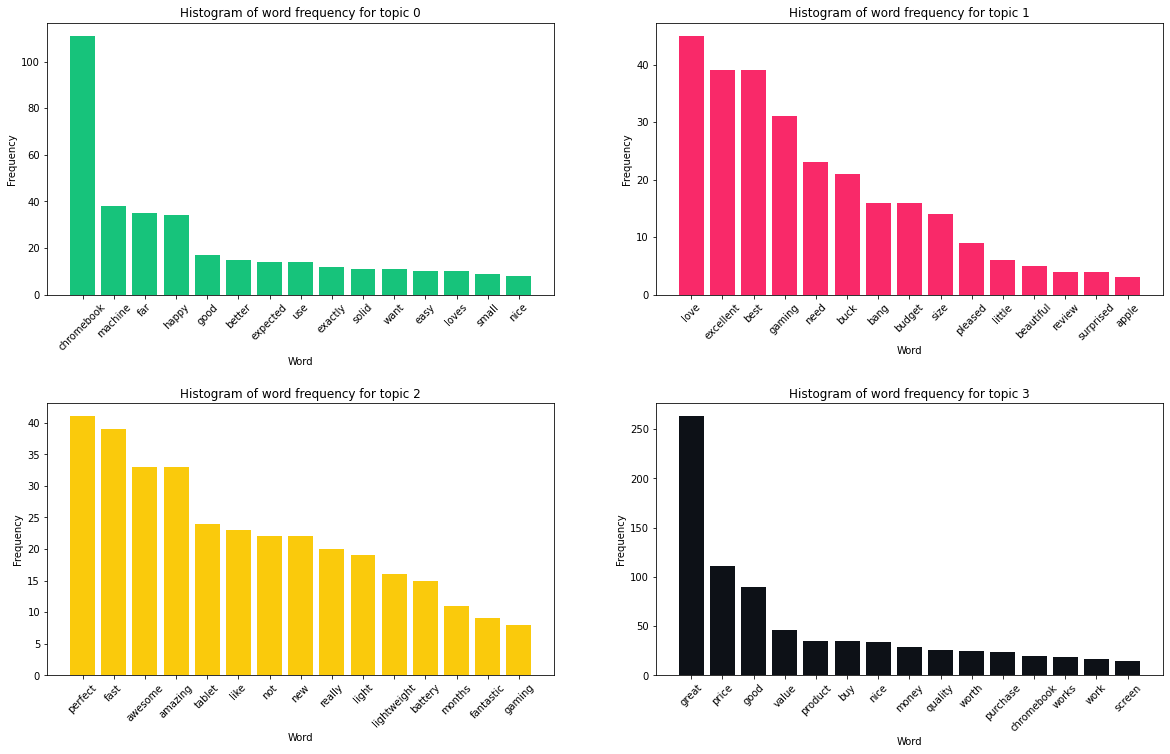

In [17]:
fig, ax = plt.subplots(figsize=(20, 12))

#Line 1
x0 = df_topic_0.Word
y0 = df_topic_0.Frequency
y0 = y0.sort_values(ascending=False)
plt.subplot(2, 2, 1)
plt.bar(x0, y0, align="center", color="#17C37B")
plt.title("Histogram of word frequency for topic 0")
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.xticks(rotation=45)

x1 = df_topic_1.Word
y1 = df_topic_1.Frequency
y1 = y1.sort_values(ascending=False)
plt.subplot(2, 2, 2)
plt.bar(x1, y1, align="center", color="#F92969")
plt.title("Histogram of word frequency for topic 1")
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.xticks(rotation=45)

#Line 1
x2 = df_topic_2.Word
y2 = df_topic_2.Frequency
y2 = y2.sort_values(ascending=False)
plt.subplot(2, 2, 3)
plt.bar(x2, y2, align="center", color="#FACA0C")
plt.title("Histogram of word frequency for topic 2")
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.xticks(rotation=45)

x3 = df_topic_3.Word
y3 = df_topic_3.Frequency
y3 = y3.sort_values(ascending=False)
plt.subplot(2, 2, 4)
plt.bar(x3, y3, align="center", color="#0D1117")
plt.title("Histogram of word frequency for topic 3")
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.xticks(rotation=45)

plt.subplots_adjust(hspace=0.4)
plt.show()

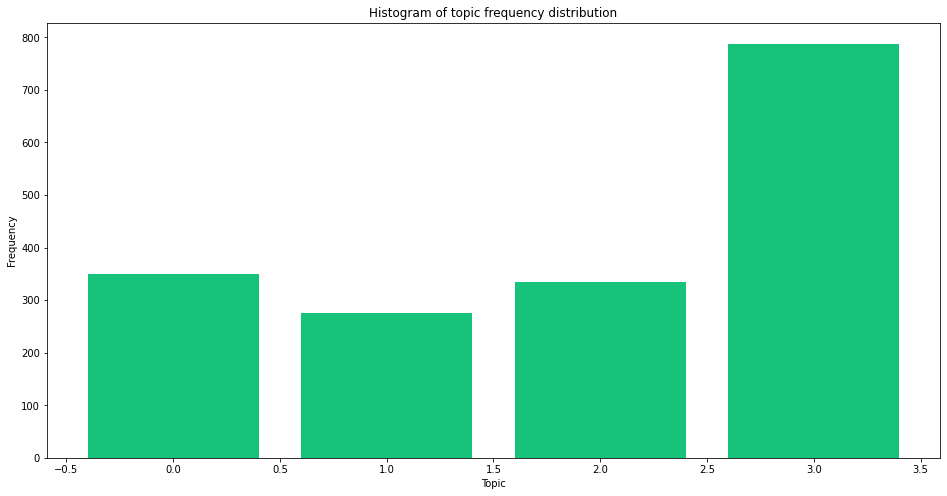

In [18]:
fig, ax = plt.subplots(figsize=(16, 8))

x1 = grouped_df.Topic
y1 = grouped_df.Frequency
plt.subplot(1, 1, 1)
plt.bar(x1, y1, align="center", color="#17C37B")
plt.title("Histogram of topic frequency distribution")
plt.xlabel("Topic")
plt.ylabel("Frequency")

plt.subplots_adjust(hspace=0.4)
plt.show()

In [19]:
topic_results = lda_model.transform(train_data)
df_data["Topic"] = topic_results.argmax(axis=1)

In [20]:
df_data.head(3)

,Pseudo,Title,Review,Rating,Verified Purchase,Date,Score,Compound,Sentiment,New rating,New date,Country,Topic
0,Assault Kittens,really good option portability,impressive form factor really good balance siz...,4.5 out of 5 stars,Yes,"Reviewed in the United States on June 18, 2021","{'neg': 0.014, 'neu': 0.736, 'pos': 0.249, 'co...",0.9941,positive,4.5,2021-06-18,United States,2
1,Kenneth Cramer,excellent portable gaming,write review anyone fence purchasing since rea...,5.0 out of 5 stars,Yes,"Reviewed in the United States on July 7, 2021","{'neg': 0.016, 'neu': 0.88, 'pos': 0.104, 'com...",0.9921,positive,5.0,2021-07-07,United States,1
2,Assault Kittens,best inch world,sell macbook best decisions lifeif use macbook...,1.0 out of 5 stars,Yes,"Reviewed in the United States on June 18, 2021","{'neg': 0.0, 'neu': 0.854, 'pos': 0.146, 'comp...",0.8779,positive,1.0,2021-06-18,United States,0
